# Data Analytics Fundamentals 1st Summative Assessment - Part 2

This section uses ```stats``` from ```scipy```, so ```scipy``` needs to be installed

```pip install scipy```

In [40]:
# Install  in virtual environment as required
!pip install --upgrade pip
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels
!pip install -U pip setuptools wheel
!pip install -U scikit-learn

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from data_source import get_data_frame
from helpers import is_significant

%matplotlib inline
sns.set_theme()

print("Pandas version:", pd.__version__)

Pandas version: 2.3.3


In [46]:
cc = get_data_frame()
cc.head()

,CustomerID,Churn,Tenure,LocalCalls,LocalMins,IntlCalls,IntlMins,IntlActive,IntlPlan,ExtraInternationalCharges,...,Age,Under30,Senior,Group,NrCustomers,DeviceProtection&OnlineBackup,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,49,No,No,No,0,Yes,One Year,Paper Check,21,703
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,51,No,No,No,0,No,One Year,Direct Debit,28,1720


### 2. Is there a significant difference in the average monthly charges between customers with and without an international plan?

We need to get the series monthly charges with and without international plans

In [47]:
charges_with_plan = cc[cc['IntlPlan'] == 'yes']['MonthlyCharges']
charges_without_plan = cc[cc['IntlPlan'] == 'no']['MonthlyCharges']
print(f"Charges with plan type: {type(charges_with_plan)}\nlength: {len(charges_with_plan)}")
print(f"Charges without plan type: {type(charges_without_plan)}\nlength: {len(charges_without_plan)}")

Charges with plan type: <class 'pandas.core.series.Series'>
length: 651
Charges without plan type: <class 'pandas.core.series.Series'>
length: 6036


Then use some funky stats work to perform an independent t-test

In [48]:
t_stat, p_value = stats.ttest_ind(charges_with_plan, charges_without_plan, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.227902884672216
p-value: 0.026164893848244112


The p-value is 0.0262. Less than our confidence of 0.05 suggesting it is significant and we reject the null hypothesis.

Yes, there is a significant difference in the average monthly charges between customers with and without an international plan.

In [49]:
print(f"Average monthly charges with international plan: {charges_with_plan.mean():.2f}")
print(f"Average monthly charges without international plan: {charges_without_plan.mean():.2f}")

Average monthly charges with international plan: 29.69
Average monthly charges without international plan: 31.18


### 3. What is the p-value of the test you used to determine the previous answer?

In [50]:
print(f"The p-value used is {p_value}")
is_significant(p_value)

The p-value used is 0.026164893848244112
✅ The difference is significant
The p-value: 0.026164893848244112 is 0.02383510615175589 less than the alpha: 0.05
The null hypothesis is rejected


True

### 4. Is there a significant difference in the average tenure between male and female customers?

In [3]:
females_tenure = cc[cc["Gender"] == "Female"]["Tenure"]
males_tenure = cc[cc["Gender"] == "Male"]["Tenure"]


In [4]:
t_stat, p_value = stats.ttest_ind(males_tenure, females_tenure, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.729407377860625
p-value: 0.46577809273573634


In [5]:
print(f"Average tenure of males: {males_tenure.mean():.2f}")
print(f"Average tenure of females: {females_tenure.mean():.2f}")

Average tenure of males: 32.57
Average tenure of females: 32.13


### 5. What is the p-value of the test you used to determine the previous answer?

In [6]:
is_significant(p_value)

❌ The difference is not significant
The p-value: 0.46577809273573634 is 0.41577809273573635 more than the alpha: 0.05
The null hypothesis is NOT rejected


False

### 6. Is there a significant difference in the average age of customers who churned versus those who did not?

In [7]:
churner_age = cc[cc["Churn"] == "Yes"]["Age"]
non_churner_age = cc[cc["Churn"] == "No"]["Age"]

print(f"Average age of churners: {churner_age.mean():.2f}")
print(f"Average age of non-churners: {non_churner_age.mean():.2f}")


Average age of churners: 50.46
Average age of non-churners: 46.34


In [8]:
t_stat, p_value = stats.ttest_ind(churner_age, non_churner_age, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 8.525338420839121
p-value: 2.3816305226480904e-17


In [9]:
is_significant(p_value)

✅ The difference is significant
The p-value: 2.3816305226480904e-17 is 0.04999999999999998 less than the alpha: 0.05
The null hypothesis is rejected


True

### 12. What are the results of the correlation between customer tenure and monthly charges telling us?


In [10]:
tenure_and_monthly_charges = cc[["Tenure", "MonthlyCharges"]]
tenure_and_monthly_charges.head(5)

,Tenure,MonthlyCharges
0,1,10
1,33,21
2,44,23
3,10,17
4,62,28


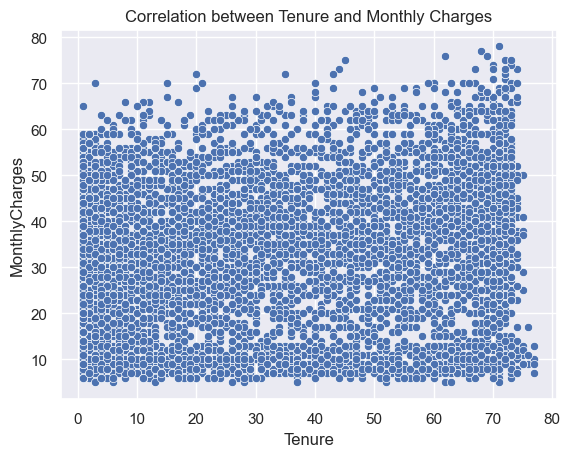

In [12]:
sns.scatterplot(x='Tenure', y='MonthlyCharges', data=tenure_and_monthly_charges)
plt.title('Correlation between Tenure and Monthly Charges')
plt.show()


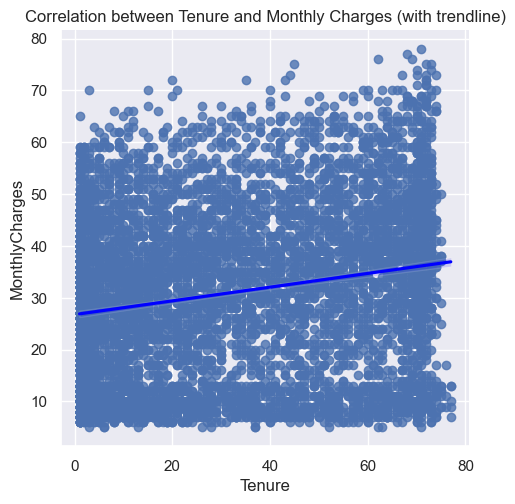

In [17]:
sns.lmplot(x='Tenure', y='MonthlyCharges', data=tenure_and_monthly_charges, line_kws={'color': 'blue'})
plt.title('Correlation between Tenure and Monthly Charges (with trendline)')
plt.show()

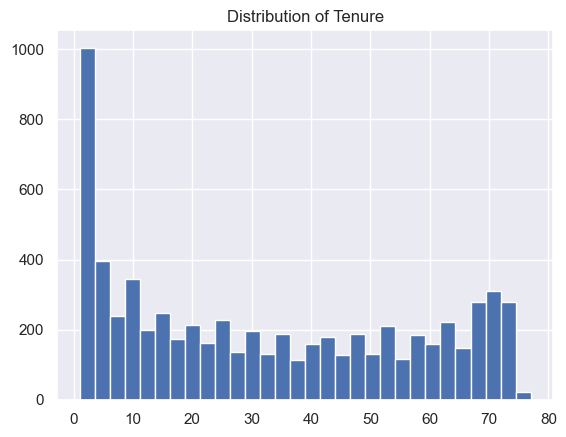

In [15]:
cc['Tenure'].hist(bins=30)
plt.title('Distribution of Tenure')
plt.show()

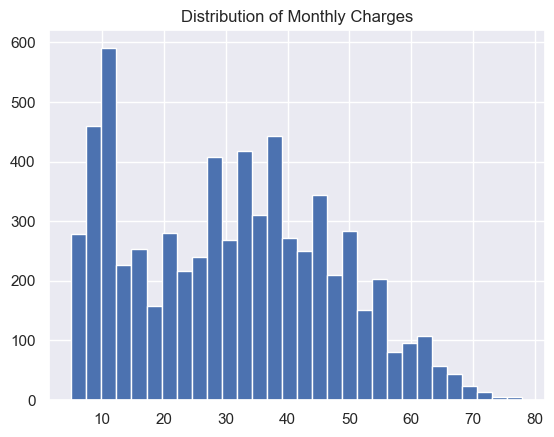

In [16]:
cc['MonthlyCharges'].hist(bins=30)
plt.title('Distribution of Monthly Charges')
plt.show()

In [21]:
print(stats.shapiro(cc['Tenure']))
print(stats.shapiro(cc['MonthlyCharges']))

ShapiroResult(statistic=np.float64(0.9059085065688965), pvalue=np.float64(1.80829796190612e-53))
ShapiroResult(statistic=np.float64(0.9627997789375339), pvalue=np.float64(2.4847977415583535e-38))


/Users/pablojoyce/Documents/Repos/python/data_analytics_ass_1/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6687.
  res = hypotest_fun_out(*samples, **kwds)


The test above, Shapiro-Wilk test is to test if the shape of the data is normal.

The p-values - np.float64(1.80829796190612e-53)) and np.float64(2.4847977415583535e-38)) - are way below the null hypothesis alpha to say that the data is normally distributed. We can reject the null hypotheses and say that the data for Tenure and for Monthly Charges are not normally distributed.

The UserWarning is from scipy warning about possible inaccuracy due to the large dataset

As the data is not normally distributed, we will use the Spearman correlation test.

In [23]:
corr, p_value = stats.spearmanr(cc['Tenure'], cc['MonthlyCharges'])
print(f"Spearman correlation: {corr:.3f}, p-value: {p_value}")

Spearman correlation: 0.191, p-value: 6.431313254885925e-56


The p-value is very low indicating that there is a strong statistical significance, even though the positive correlation is weak, meaning that monthly charges raise slightly with tenure length.

### 15. Investigate the relationship between tenure and monthly charges. What does the regression analysis suggest about how tenure impacts monthly charges?

In [18]:
cc[["Tenure", "MonthlyCharges"]].info() # sanity check, e.g. that they are type int64
cc[["Tenure", "MonthlyCharges"]].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Tenure          6687 non-null   int64
 1   MonthlyCharges  6687 non-null   int64
dtypes: int64(2)
memory usage: 104.6 KB


,Tenure,MonthlyCharges
0,1,10
1,33,21
2,44,23
3,10,17
4,62,28


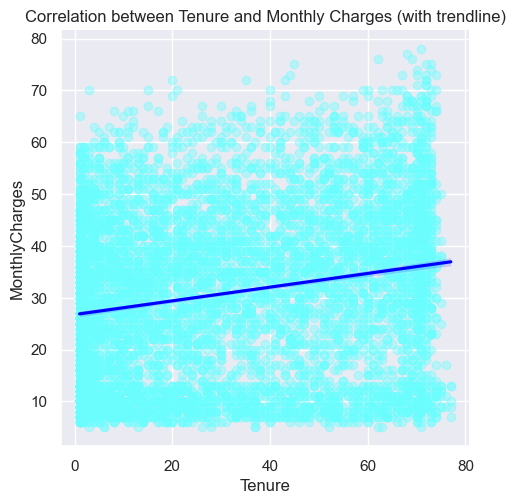

In [33]:
sns.lmplot(x='Tenure', y='MonthlyCharges', data=cc, line_kws={'color': 'blue'}, scatter_kws={'alpha': 0.4, 'color': '#6bffff'},)
plt.title('Correlation between Tenure and Monthly Charges (with trendline)')
plt.show()

In [34]:
corr = cc["Tenure"].corr(cc["MonthlyCharges"])
print(f"Correlation between Tenure and Monthly Charges: {corr:.3f}")

Correlation between Tenure and Monthly Charges: 0.200


In [42]:
# the formula for this linear regression is MonthlyCharges = B0 (intercept) + B1 (slope) * Tenure + Error term (random noise or unexplained variation
X = sm.add_constant(cc["Tenure"]) # X is the independent variable - the one that may affect the dependent variable - add_constant is needed to give an intercept value though I am not clear on how this happens yet.
y = cc["MonthlyCharges"] # y is the dependent variable - the one we are interested in

model = sm.OLS(y, X).fit() # sm.OLS(y, X) creates a model object of type statsmodels.regression.linear_model.OLS.
# OLS = Ordinary Least Squares — the method of fitting a straight line that minimizes the squared differences between predicted and actual values.
# the args tell it that y = dependent variable, and X = independent variables (with the constant already added)
# .fit() runs the estimation, i.e. calculates the best fitting line
print(model.summary()) # prints a full statistical report of your fitted model - below

                            OLS Regression Results                            
Dep. Variable:         MonthlyCharges   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           4.78e-61
Time:                        15:31:14   Log-Likelihood:                -28012.
No. Observations:                6687   AIC:                         5.603e+04
Df Residuals:                    6685   BIC:                         5.604e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.7562      0.322     82.979      0.0